In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
titanic_train = pd.read_csv('./titanic_datasets/train.csv')
titanic_test = pd.read_csv('./titanic_datasets/test.csv')
y_test = pd.read_csv('./titanic_datasets/gender_submission.csv')
titanic_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
titanic_test = titanic_test.merge(y_test)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [29]:
titanic_train= titanic_train.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [30]:
titanic_train['Sex'] = titanic_train['Sex'].replace(['female', 'male'], [0,1])
titanic_test['Sex'] = titanic_test['Sex'].replace(['female', 'male'], [0,1])


In [31]:
print(titanic_test['Sex'])


0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64


In [32]:
titanic_train['Age'].fillna(titanic_train['Age'].median(), inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(), inplace=True)
titanic_test=  titanic_test.dropna()


In [33]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Survived'],
      dtype='object')

In [34]:
#train dataset
y_train = titanic_train['Survived']
X_train=titanic_train.drop('Survived', axis=1)
X_train=X_train.drop('PassengerId', axis=1)

#test dataset
y_test = titanic_test['Survived']
X_test=titanic_test.drop('Survived', axis=1)
X_test=X_test.drop('PassengerId', axis=1)

X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [35]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [36]:
#procent istotności
dtcttc = list(zip(dtc.feature_importances_, X_train.columns))
dtcttc.sort(key = lambda x:x[0])
dtcttc


[(0.028249058667800617, 'Parch'),
 (0.04735299106270279, 'SibSp'),
 (0.1118131397738236, 'Pclass'),
 (0.23397363787875572, 'Age'),
 (0.26773022730225415, 'Fare'),
 (0.31088094531466315, 'Sex')]

In [62]:
def dtc_list(x=X_train, y=y_train):
    dtc = DecisionTreeClassifier(criterion='gini')
    dtc.fit(X_train, y_train)
    # jeśli titanic_test jest równy y_test, to daje się 1
    acc = [1 for i,j in zip(dtc.predict(X_test),y_test) if i==j ]
    return len(acc)/len(y_test)

def rfc_list(x=X_train, y=y_train):
    dtc = RandomForestClassifier(criterion='gini')
    dtc.fit(X_train, y_train)
    # jeśli titanic_test jest równy y_test, to daje się 1
    acc = [1 for i,j in zip(dtc.predict(X_test),y_test) if i==j ]
    return len(acc)/len(y_test)

In [38]:
#acccuracy
dl = np.array([dtc_list() for i in range(10)])
rl = np.array([rfc_list() for i in range(10)])
[dl.max(),
rl.max(),
dl.min(),
rl.min(),
dl.mean(),
rl.mean()]

[0.7434052757793765,
 0.8225419664268585,
 0.7218225419664268,
 0.8081534772182254,
 0.7335731414868106,
 0.8165467625899281]

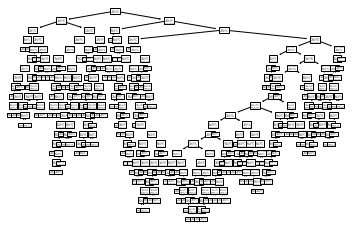

In [39]:
# wizualizacja danych wyjściowych w scikit-learn
plot_tree(dtc)
plt.savefig('./dtc.png')

In [40]:
X = X_train.drop('Age', axis=1)
y = X_train['Age']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [41]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(X, y)
dtrprd = dtr.predict(X)
dtr.score(X, y)


0.7053490315065174

In [42]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Survived     417 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 29.3 KB


In [43]:
ttwn = ttwn.drop(['PassengerId','Survived'], axis=1 )
y_ttwn = ttwn['Age']

In [44]:
X_ttwn = ttwn

In [45]:
dtr = DecisionTreeRegressor()
dtr.fit(X_ttwn, y_ttwn)
dtr.score(X_ttwn, y_ttwn)

1.0

In [46]:
# sprawdzanie wyników działania randomfroesta na nowym zbiorze danych z predykcjami w kolumnie Age, zamiast mediany

titanic_train_incomplete=  titanic_train.dropna()
titanic_train_incomplete = titanic_train_incomplete.drop(['Survived','PassengerId'], axis=1)
titanic_train_incomplete = titanic_train_incomplete.drop('Age', axis=1)


age_predicted = pd.DataFrame(dtrprd)
titanic_train.Age = age_predicted
titanic_train_complete = titanic_train
titanic_train_complete = titanic_train_complete.drop(['Survived', 'PassengerId'], axis=1)

titanic_train_incomplete.info()
# titanic_train_complete.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 41.8 KB


In [47]:
dtr = DecisionTreeRegressor()
dtr = dtr.fit(titanic_train_incomplete, titanic_train_complete['Age'])
dtrprd = dtr.predict(titanic_train_incomplete)
dtr.score(titanic_train_incomplete, titanic_train_complete['Age'])




1.0

In [54]:
titanic_train = pd.read_csv('./titanic_datasets/train.csv')
titanic_test = pd.read_csv('./titanic_datasets/test.csv')
y_test = pd.read_csv('./titanic_datasets/gender_submission.csv')


titanic_train= titanic_train.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Name', 'Embarked', 'Cabin'], axis=1)
titanic_train['Sex'] = titanic_train['Sex'].replace(['female', 'male'], [0,1])
titanic_test['Sex'] = titanic_test['Sex'].replace(['female', 'male'], [0,1])


ttc = titanic_train
ttwn = titanic_train.dropna()
ttn =ttc.iloc[[i for i in range(len(ttc)) if i not in ttwn['PassengerId']]]
# ttn.info()

# titanic_test_with_age = titanic_test['Age']
# ttn.info()



c:\Users\Krzysztof\anaconda3\envs\xd\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


891

In [57]:
ttn = ttn.drop(['PassengerId','Survived', 'Age'], axis=1)

In [59]:
ttn.insert(3, 'Age', dtr.predict(ttn))

In [64]:
y_1 = ttn['Age']
X_1 = ttn.drop('Age', axis=1)
rfc_list(X_1, y_1)

0.0